<module 'random_forest' from '/home/julia/uma-random-forest/src/random_forest.py'>

In [2]:
from datasets.mushrooms import MushroomDataset
from random_forest import RandomForestClassifier, TournamentRandomForestClassifier
import math, time
from utils.experiments import grid_search


# Load dataset

In [3]:
path = "../data/mushroom/agaricus-lepiota.data"
dataset = MushroomDataset(path=path)
dataset.clean()
X_train, X_val, y_train, y_val = dataset.split(test_size=0.2, random_state=42)

In [4]:
n_features = round(math.sqrt(X_train.shape[1]))

# Random forest classifier

In [4]:
params_matrix = {
    "n_trees": [20, 30, 40, 50],
    "max_depth": [
        3, 5, 7
    ],
    "max_split_values" : [1000],
    "max_features": [n_features],
}

In [5]:

save_path = "../out/mushrooms/random_forest_classifier.csv"
n_calls = 1
time_start = time.time()
best_params, score, all_results = grid_search(
    params_matrix, RandomForestClassifier, X_train, X_val, y_train, y_val, n_calls, path = save_path
)
print(f"Execution time: {time.time() - time_start}")
print(f"Best params: {best_params}")
print(f"Best score: {score}")
print(f"All rEsults: {all_results}")

  0%|          | 0/3 [00:00<?, ?it/s]INFO:root:RandomForestClassifier: n_trees=10, max_depth=3
INFO:root:DecisionTreeClassifier(max_depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=46, split_val=0.5, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=27, split_val=0.5, depth=2) created
INFO:root:Node(split_feature=20, split_val=0.5, depth=1) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=28, split_val=0.5, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=2) created
INFO:root:Node(split_feature=23, split_val=0.5, depth=1) created
INFO:root:Node(split_feature=98, split_val=0.5, de

Execution time: 2.7171249389648438
Best params: {'n_trees': 10, 'max_depth': 7, 'max_split_values': 1000, 'max_features': 11}
Best score: 0.9993846153846154
All rEsults: [{'n_trees': 10, 'max_depth': 3, 'max_split_values': 1000, 'max_features': 11, 'accuracy': 0.939076923076923, 'precision': 0.8949044585987261, 'recall': 1.0, 'f1': 0.9445378151260504}, {'n_trees': 10, 'max_depth': 5, 'max_split_values': 1000, 'max_features': 11, 'accuracy': 0.9950769230769231, 'precision': 0.9905992949471211, 'recall': 1.0, 'f1': 0.9952774498229043}, {'n_trees': 10, 'max_depth': 7, 'max_split_values': 1000, 'max_features': 11, 'accuracy': 0.9993846153846154, 'precision': 0.9988151658767772, 'recall': 1.0, 'f1': 0.999407231772377}]


# Tournament Random forest

In [6]:
params_matrix = {
    "n_trees": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "tournament_size": [3, 5, 7],
    "max_features": [n_features],
}

In [9]:
from utils.experiments import grid_search
save_path = "../out/mushrooms/tournament_forest_classifier.csv"

n_calls = 1

best_params, score, all_results = grid_search(params_matrix, TournamentRandomForestClassifier, X_train, X_val, y_train, y_val, n_calls)
print(f"Best params: {best_params}")
print(f"Best score: {score}")
print(f"All rEsults: {all_results}")

  0%|          | 0/27 [00:00<?, ?it/s]INFO:root:RandomForestClassifier: n_trees=100, max_depth=3
INFO:root:TournamentRandomForestClassifier: n_trees=100, max_depth=3, tournament_size=3
INFO:root:TournamentDecisionTreeClassifier(max_depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=16, split_val=0.5, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=2) created
INFO:root:Node(split_feature=79, split_val=0.5, depth=1) created
INFO:root:Node(split_feature=None, split_val=None, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=2) created
INFO:root:Node(split_feature=24, split_val=0.5, depth=1) created
INFO:root:Node(split_feature=14, split_val=0.5, depth=0) created
INFO:root:TournamentDecisionTreeClassifier(max_depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(spli

Best params: {'n_trees': 100, 'max_depth': 3, 'tournament_size': 3, 'max_features': 11}
Best score: 0.5187692307692308
All rEsults: [{'n_trees': 100, 'max_depth': 3, 'tournament_size': 3, 'max_features': 11, 'accuracy': 0.5187692307692308, 'precision': 0.5187692307692308, 'recall': 1.0, 'f1': 0.6831442463533225}, {'n_trees': 100, 'max_depth': 3, 'tournament_size': 5, 'max_features': 11, 'accuracy': 0.5187692307692308, 'precision': 0.5187692307692308, 'recall': 1.0, 'f1': 0.6831442463533225}, {'n_trees': 100, 'max_depth': 3, 'tournament_size': 7, 'max_features': 11, 'accuracy': 0.5187692307692308, 'precision': 0.5187692307692308, 'recall': 1.0, 'f1': 0.6831442463533225}, {'n_trees': 100, 'max_depth': 5, 'tournament_size': 3, 'max_features': 11, 'accuracy': 0.5187692307692308, 'precision': 0.5187692307692308, 'recall': 1.0, 'f1': 0.6831442463533225}, {'n_trees': 100, 'max_depth': 5, 'tournament_size': 5, 'max_features': 11, 'accuracy': 0.5187692307692308, 'precision': 0.5187692307692308,

In [11]:
import pandas as pd

df = pd.DataFrame(all_results)
df.to_csv(save_path)

In [5]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import matplotlib.pyplot as plt
import numpy as np

In [7]:
model = RandomForestClassifier(n_trees=100, max_depth=7, max_features=n_features, max_split_values=1000)
model.fit(X_train, y_train)
y_pred = np.array([model.predict(x) for x in X_val])

INFO:root:RandomForestClassifier: n_trees=100, max_depth=7


INFO:root:DecisionTreeClassifier(max_depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=28, split_val=0.5, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=110, split_val=0.5, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=35, split_val=0.5, depth=5) created
INFO:root:Node(split_feature=111, split_val=0.5, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=4) created
INFO:root:Node(split_feature=100, split_val=0.5, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:r

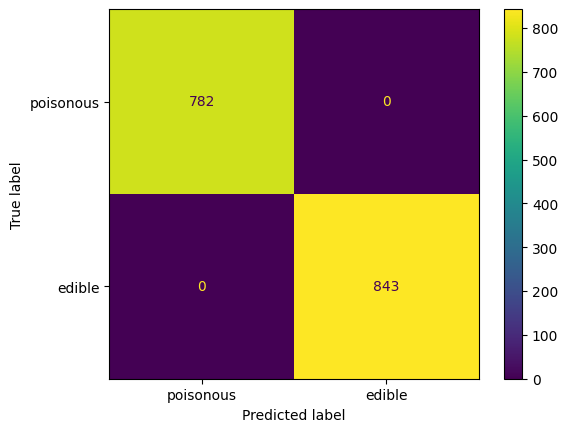

In [10]:
path = "../out/mushrooms/random_forest_cm_d7_nt100.png"
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["poisonous", "edible"])
disp.plot()
plt.savefig(path)

In [11]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 1.0
F1: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
model = RandomForestClassifier(n_trees=50, max_depth=7, tournament_size=7, max_features=n_features, max_split_values=1000)
model.fit(X_train, y_train)
y_pred = np.array([model.predict(x) for x in X_val])